Sell analysis

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [4]:
alucar = pd.read_csv('data/alucar.csv')

Verifying dataframe

In [5]:
dataframe_verification = {'lineXcol' :alucar.shape, 'nulldatas' :alucar.isna().sum().sum(), 'datatypes':alucar.dtypes}
dataframe_verification                         

{'lineXcol': (24, 2),
 'nulldatas': 0,
 'datatypes': mes       object
 vendas     int64
 dtype: object}

In [6]:
#convert int64 to datetime
alucar.mes = pd.to_datetime(alucar.mes)

In [31]:
#line plot funcition config
def plot(title, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(14,6)
    ax.set_title(title, loc='Center', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax=ax

First Graphics

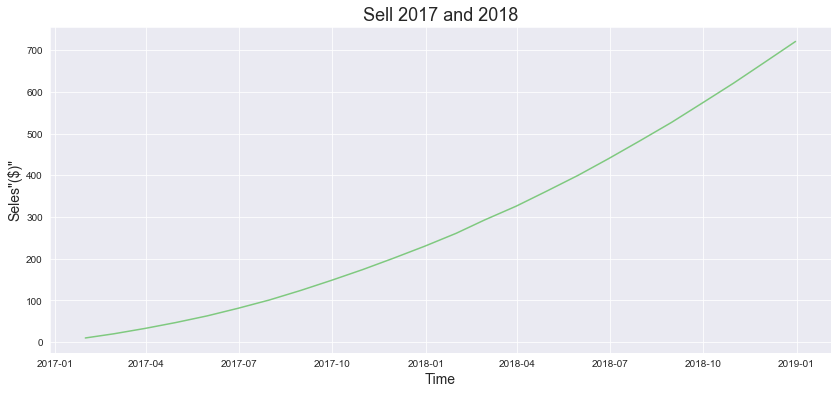

In [32]:
#Graphic Sell by month
plot('Sell 2017 and 2018','Time','Seles"($)"','mes','vendas', alucar)


In [9]:
#Sell growth
alucar['growth']= alucar.vendas.diff()

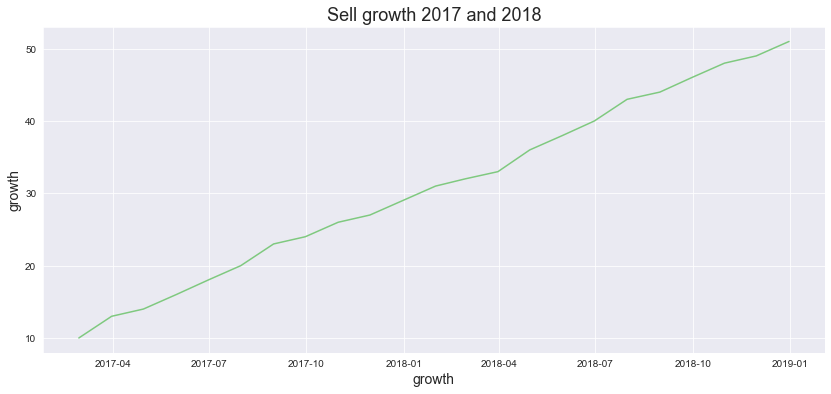

In [10]:
#Graphic groth sell by month
plot('Sell growth 2017 and 2018', 'growth', 'Time','mes','growth', alucar)

In [11]:
#Sell growth rate

In [12]:
alucar['growth_rate']= alucar.growth.diff()

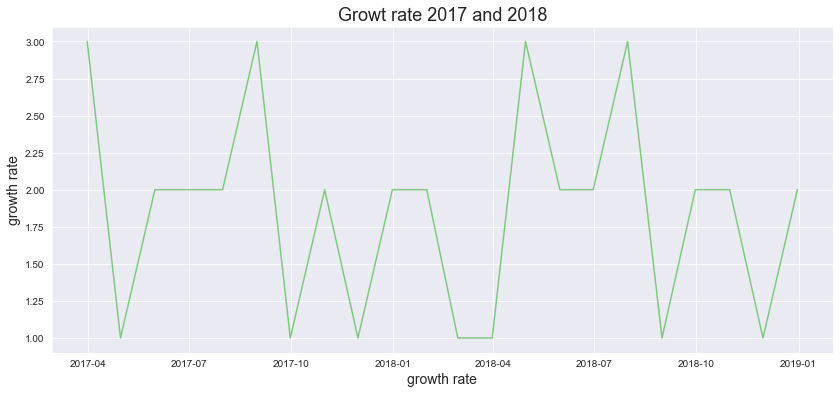

In [13]:
plot('Growt rate 2017 and 2018', 'growth rate','Time', 'mes', 'growth_rate', alucar)

In [29]:
#Gropup the 3 graphs in one figure
def plot_three(title,x,y1,y2,y3,dataset):
    plt.figure(figsize=(16,20))
    ax = plt.subplot(3,1,1)
    ax.set_title(title)
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax = ax

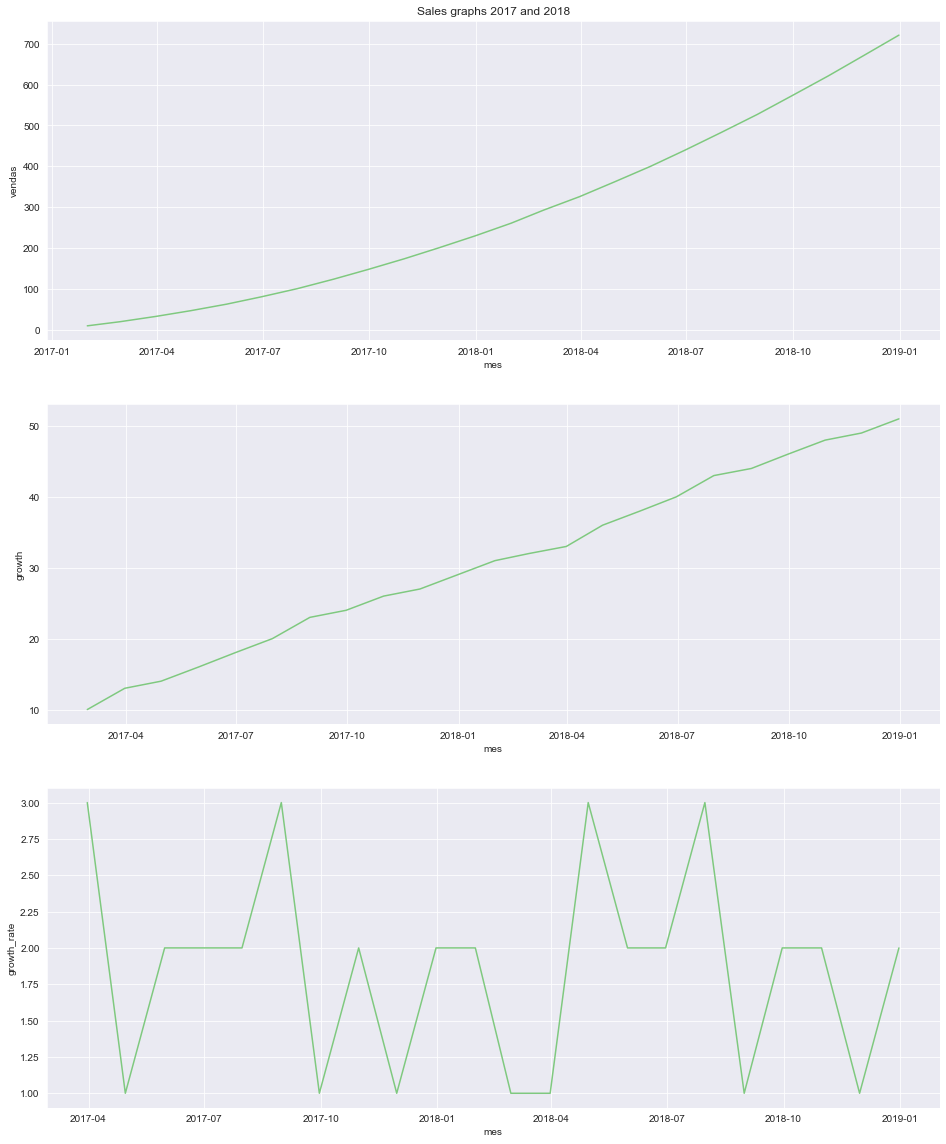

In [33]:
plot_three('Sales graphs 2017 and 2018', 'mes','vendas', 'growth', 'growth_rate',alucar)

Autocorrelation graphs

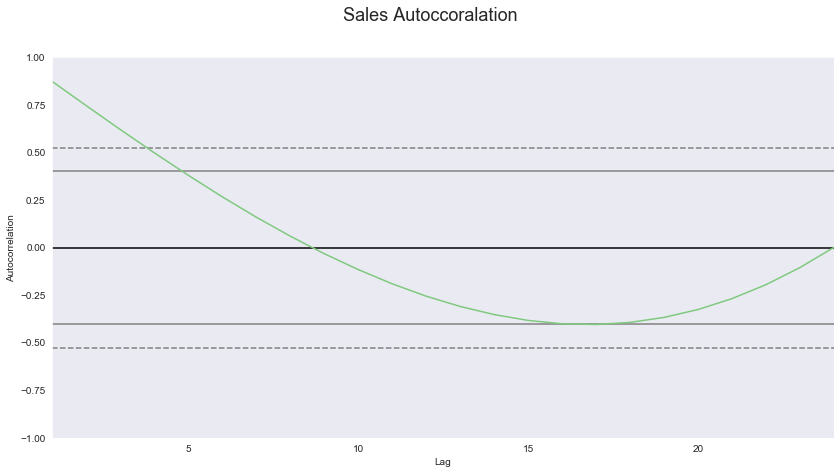

In [20]:
ax= plt.figure(figsize=(14,7))
ax.suptitle('Sales Autoccoralation', fontsize=18)
autocorrelation_plot(alucar.vendas)
ax=ax

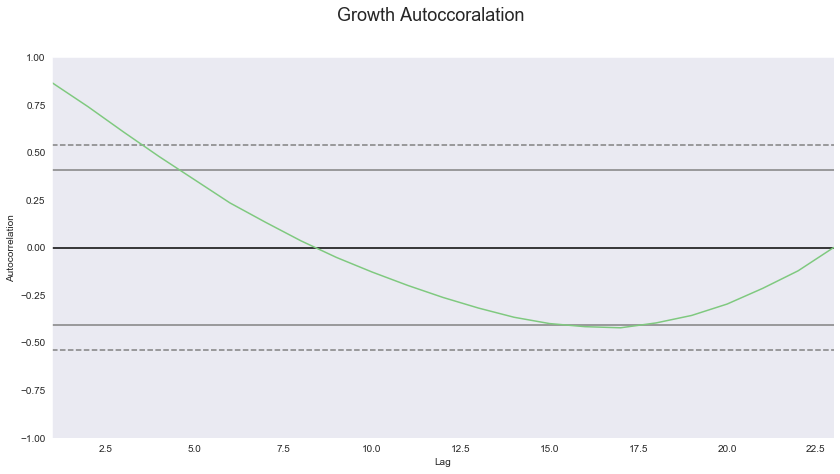

In [21]:
ax= plt.figure(figsize=(14,7))
ax.suptitle('Growth Autoccoralation', fontsize=18)
autocorrelation_plot(alucar.growth[1:])
ax=ax

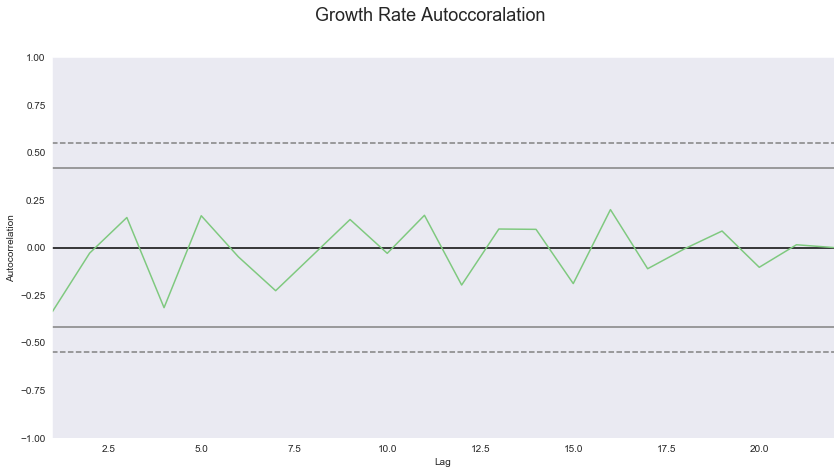

In [22]:
ax= plt.figure(figsize=(14,7))
ax.suptitle('Growth Rate Autoccoralation', fontsize=18)
autocorrelation_plot(alucar.growth_rate[2:])
ax=ax

In [25]:
newsletter_users = pd.read_csv('data/newsletter_alucar.csv')
newsletter_users.mes = pd.to_datetime(newsletter_users.mes)

In [27]:
newsletter_users['growth'] = newsletter_users.assinantes.diff()
newsletter_users['growth_rate'] = newsletter_users.growth.diff()

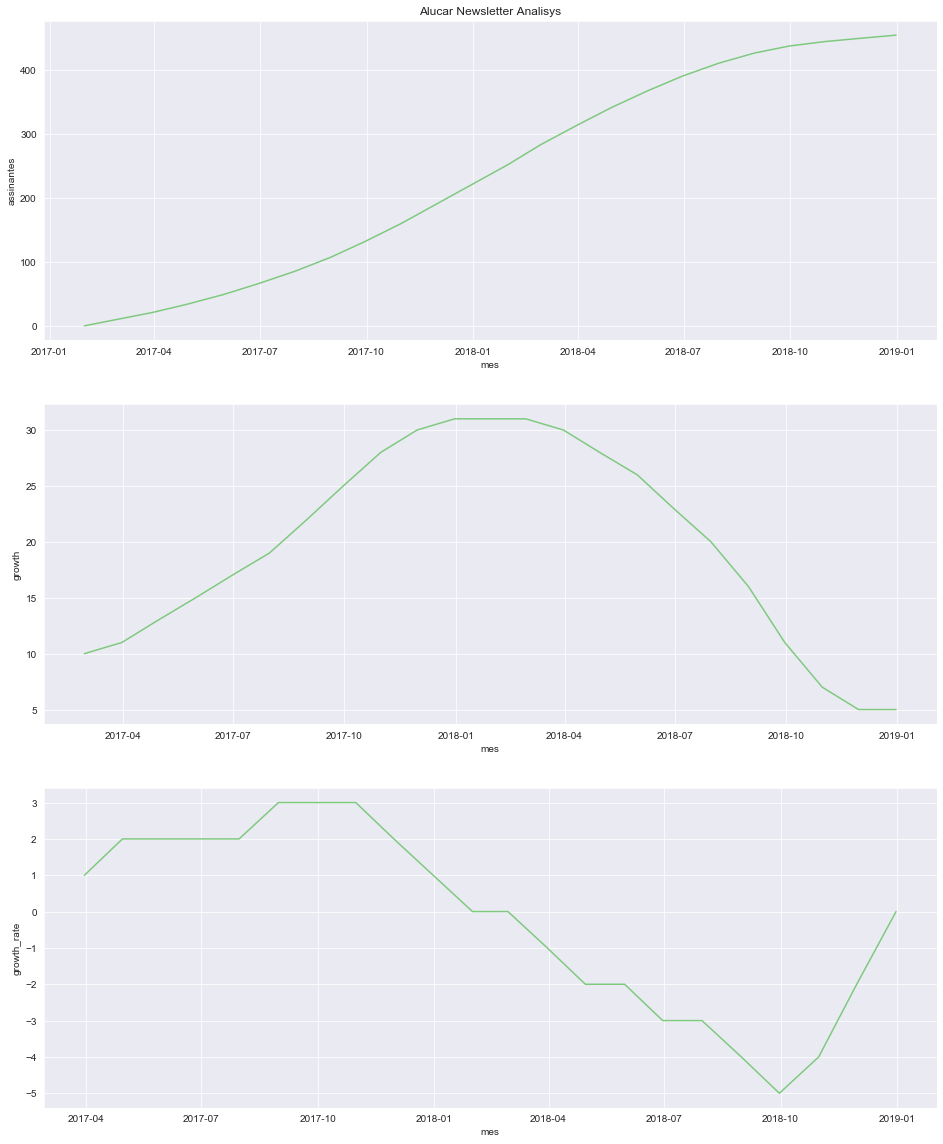

In [35]:
plot_three('Alucar Newsletter Analisys', 'mes', 'assinantes', 'growth', 'growth_rate', newsletter_users)

Chocolura analysis - chocolate business

In [36]:
chocolura = pd.read_csv('data/chocolura.csv')

In [38]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [47]:
chocolura['growth'] = chocolura.vendas.diff()
chocolura['growth_rate'] = chocolura.growth.diff()

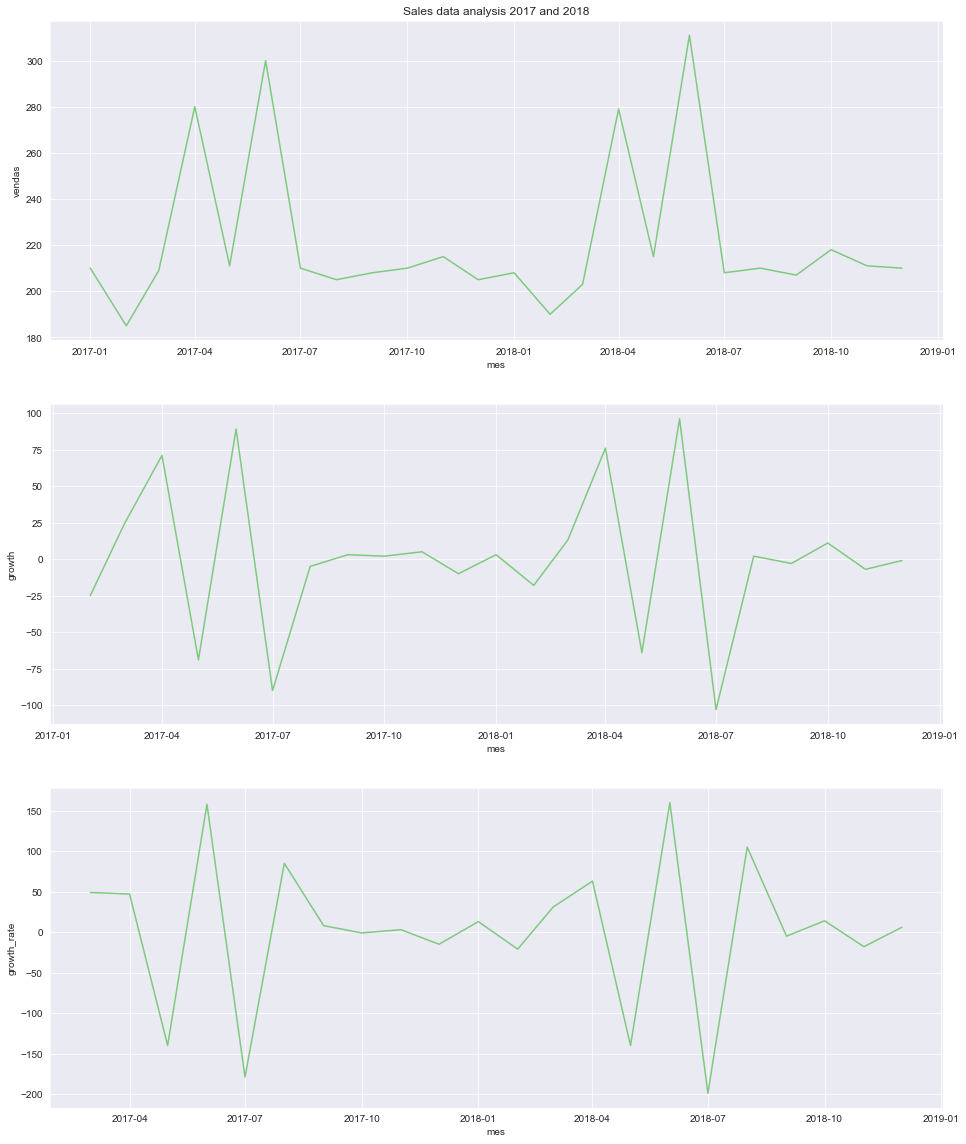

In [49]:
plot_three('Sales data analysis 2017 and 2018','mes','vendas','growth', 'growth_rate', chocolura)

Chocolura sell by day

In [56]:
sell_by_day = pd.read_csv('data/vendas_por_dia.csv')
sell_by_day.dia = pd.to_datetime(sell_by_day.dia)
sell_by_day['growth'] = sell_by_day.vendas.diff()
sell_by_day['growth_rate'] = sell_by_day.growth.diff()

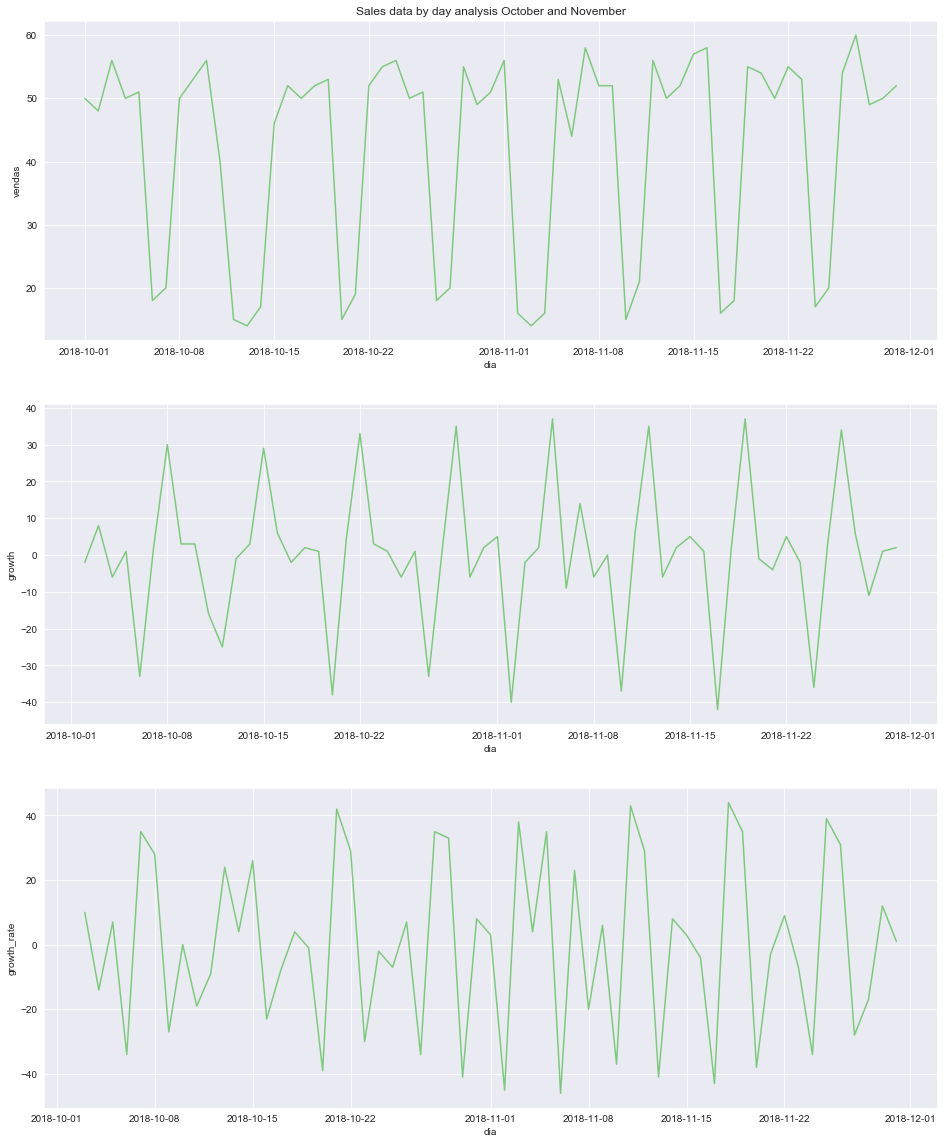

In [59]:
plot_three('Sales data by day analysis October and November','dia','vendas','growth', 'growth_rate', sell_by_day)

In [63]:
sell_by_day['Weekday'] = sell_by_day.dia.dt.day_name()

In [70]:
sales_grouped = sell_by_day.groupby('Weekday')['vendas','growth', 'growth_rate'].mean().round()

D:\Users\Igor\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [71]:
sales_grouped

,vendas,growth,growth_rate
Weekday,,,
Friday,45.0,-7.0,-5.0
Monday,52.0,34.0,31.0
Saturday,16.0,-28.0,-20.0
Sunday,19.0,3.0,31.0
Thursday,51.0,-2.0,-3.0
Tuesday,52.0,-1.0,-34.0
Wednesday,53.0,1.0,2.0
